
# 차원의 저주 (Curse of Dimensionality)
고차원 데이터에서 발생하는 문제를 설명하는 용어로, 차원이 증가함에 따라 데이터 분석 및 학습이 어려워지는 현상을 말합니다.

### 주요 원인
- 고차원에서 데이터의 밀도가 급격히 낮아짐.
- 거리 기반 알고리즘의 성능 저하.

---


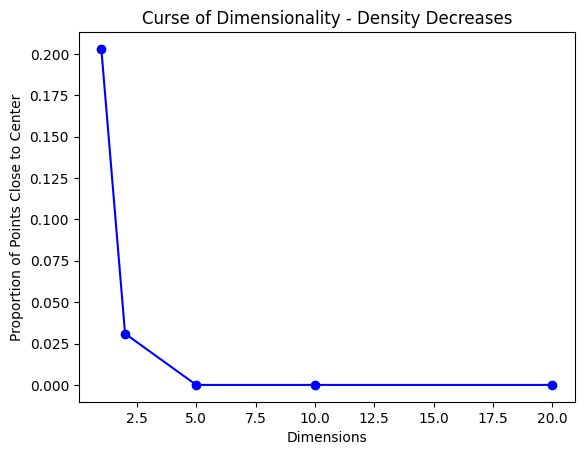

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 밀도 계산
dims = [1, 2, 5, 10, 20]
samples = 1000
volumes = []

for d in dims:
    points = np.random.uniform(0, 1, size=(samples, d))
    distances = np.linalg.norm(points - 0.5, axis=1)  # 중심에서의 거리
    volumes.append(np.mean(distances < 0.1))  # 밀도 계산

# 시각화
plt.plot(dims, volumes, marker='o', color='blue')
plt.title("Curse of Dimensionality - Density Decreases")
plt.xlabel("Dimensions")
plt.ylabel("Proportion of Points Close to Center")
plt.show()



# 피처 선택 (Feature Selection)
### 정의
d개의 피처 중 가장 많은 정보를 가진 k개의 피처를 선택하여 나머지 피처를 제거하는 기법.

### 특징
- 정보 손실 없이 중복되거나 부적절한 피처 제거.
- 데이터 해석력과 모델 성능 향상.

---


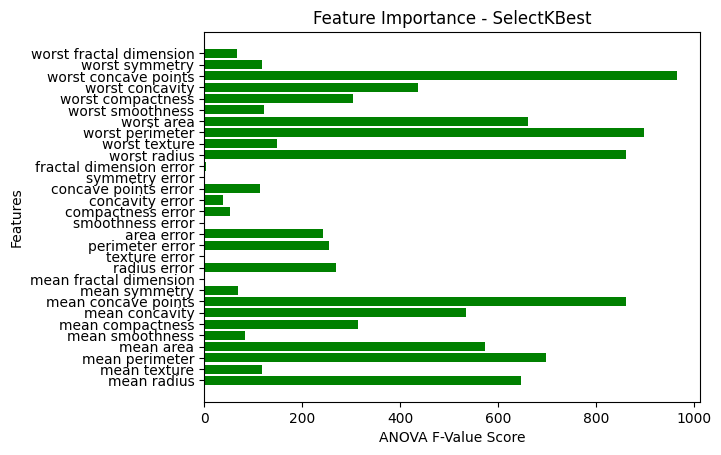

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# 데이터 로드
data = load_breast_cancer()
X, y = data.data, data.target

# 피처 선택
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
scores = selector.scores_

# 시각화
plt.barh(data.feature_names, scores, color='green')
plt.title("Feature Importance - SelectKBest")
plt.xlabel("ANOVA F-Value Score")
plt.ylabel("Features")
plt.show()



# 피처 추출 (Feature Extraction)
### 정의
d개의 피처를 조합하여 새로운 k개의 피처를 생성하는 기법.

### 주요 알고리즘
1. **PCA (Principal Component Analysis)**: 분산이 큰 축을 선택.
2. **LDA (Linear Discriminant Analysis)**: 클래스 간 분리를 최대화.
3. **SVD (Singular Value Decomposition)**: 행렬 분해를 통해 차원 축소.
4. **NMF (Non-Negative Matrix Factorization)**: 비음수 행렬 분해.

---


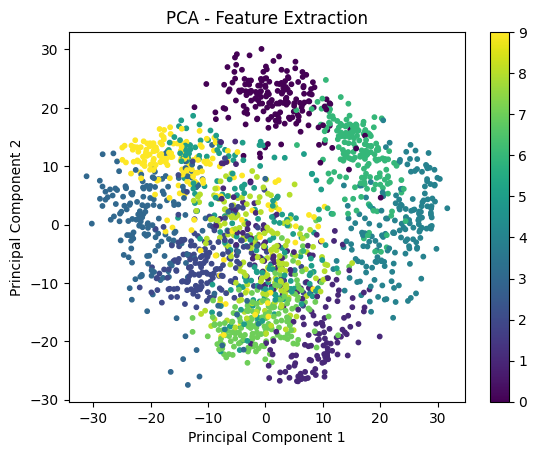

In [3]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# 데이터 로드
digits = load_digits()
X, y = digits.data, digits.target

# PCA 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=10)
plt.title("PCA - Feature Extraction")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()



# PCA (Principal Component Analysis)
### 정의
주성분(Principal Component)을 추출하여 데이터의 정보를 최대한 보존하면서 차원을 축소.

### 특징
- 분산이 큰 축을 찾아 데이터 특성을 잘 나타내는 축을 선택.
- 데이터의 스케일 정규화 필요.

---


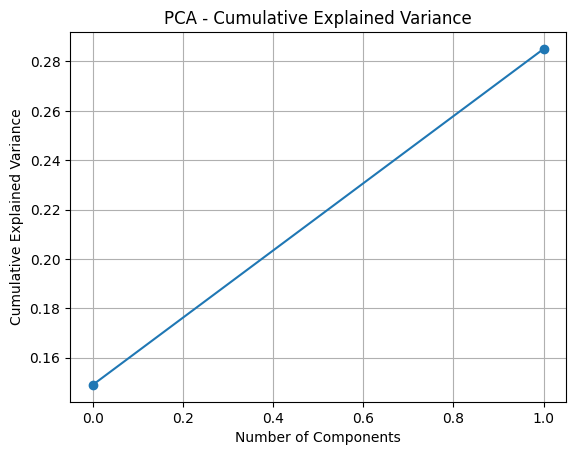

In [4]:
# PCA에서 분산 설명률 시각화
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("PCA - Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()



# LDA (Linear Discriminant Analysis)
### 정의
입력 데이터의 클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 축을 찾는 기법.

### 특징
- PCA는 데이터의 변동성이 큰 축을 찾는 데 비해, LDA는 클래스 분리를 최대화하는 축을 찾음.

---


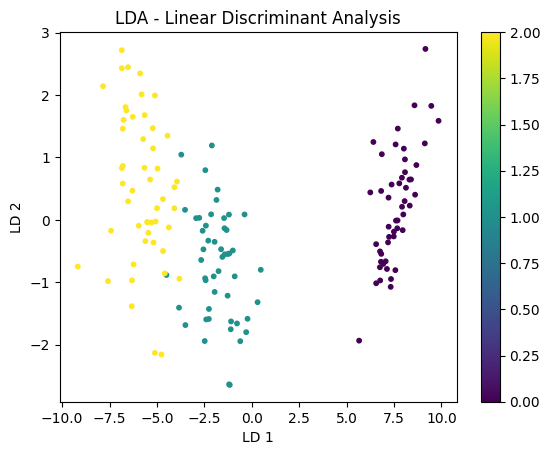

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris

# 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# LDA 적용
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

# 시각화
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', s=10)
plt.title("LDA - Linear Discriminant Analysis")
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.colorbar()
plt.show()



# SVD (Singular Value Decomposition)
### 정의
행렬 분해를 통해 데이터의 차원을 축소.

### 방식
1. **Thin SVD**: 대각이 아닌 부분 제거.
2. **Compact SVD**: 대각 중 0인 값 제거.
3. **Truncated SVD**: 대각 중 0이 아닌 값 일부 제거.

---


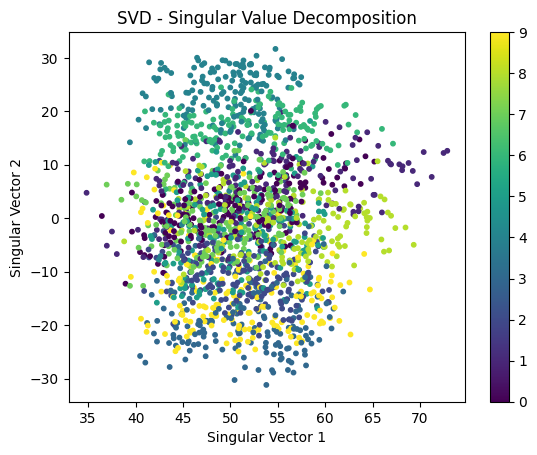

In [6]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_digits

# 데이터 로드
X, y = digits.data, digits.target

# SVD 적용
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# 시각화
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y, cmap='viridis', s=10)
plt.title("SVD - Singular Value Decomposition")
plt.xlabel("Singular Vector 1")
plt.ylabel("Singular Vector 2")
plt.colorbar()
plt.show()



# NMF (Non-Negative Matrix Factorization)
### 정의
모든 원소 값이 양수인 행렬을 두 개의 양수 행렬로 분해.

### 특징
- SVD와 유사하게 낮은 랭크를 통해 행렬을 근사.

---


/opt/anaconda3/envs/tf-metal/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


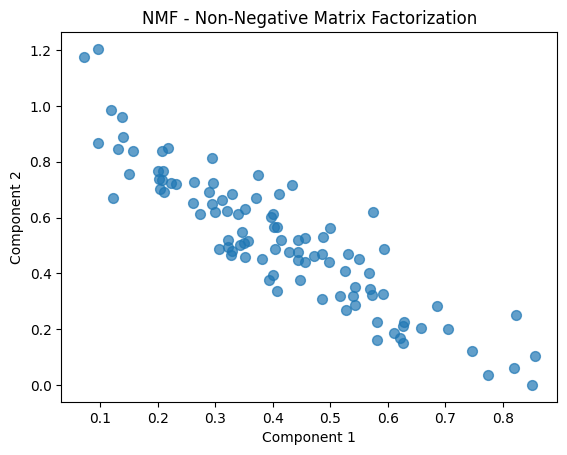

In [7]:
from sklearn.decomposition import NMF

# 데이터 생성
X = np.abs(np.random.randn(100, 50))  # 비음수 행렬

# NMF 적용
nmf = NMF(n_components=2, random_state=42)
W = nmf.fit_transform(X)
H = nmf.components_

# 시각화
plt.scatter(W[:, 0], W[:, 1], alpha=0.7, s=50)
plt.title("NMF - Non-Negative Matrix Factorization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()
